# Rossmann Pharmaceuticals Sales Forecast Analysis

In [ ]:
import sys
import os
sys.path.append('../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import logging

if 'preprocessor' in sys.modules:
    del sys.modules['preprocessor']
if 'model_builder' in sys.modules:
    del sys.modules['model_builder']
if 'evaluator' in sys.modules:
    del sys.modules['evaluator']

from preprocessor import Preprocessor
from model_builder import ModelBuilder
from evaluator import Evaluator


## Data Loading and Preprocessing

2024-09-23 15:44:38,277 - INFO - Loading data...
C:\Users\bab\AppData\Local\Temp\ipykernel_2412\2155673606.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('../resources/Data/train.csv')
2024-09-23 15:44:40,073 - INFO - Train shape: (1017209, 9), Test shape: (41088, 8), Store shape: (1115, 10)
2024-09-23 15:44:40,074 - INFO - Merging data...
2024-09-23 15:44:40,491 - INFO - Merged train shape: (1017209, 18), Merged test shape: (41088, 17)
2024-09-23 15:44:40,491 - INFO - Preprocessing data...
2024-09-23 15:44:40,657 - INFO - Initialized Preprocessor with 12 holidays
2024-09-23 15:44:40,658 - INFO - Starting preprocessing...
2024-09-23 15:44:40,659 - INFO - Initial DataFrame shape: (1017209, 18)
 columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear

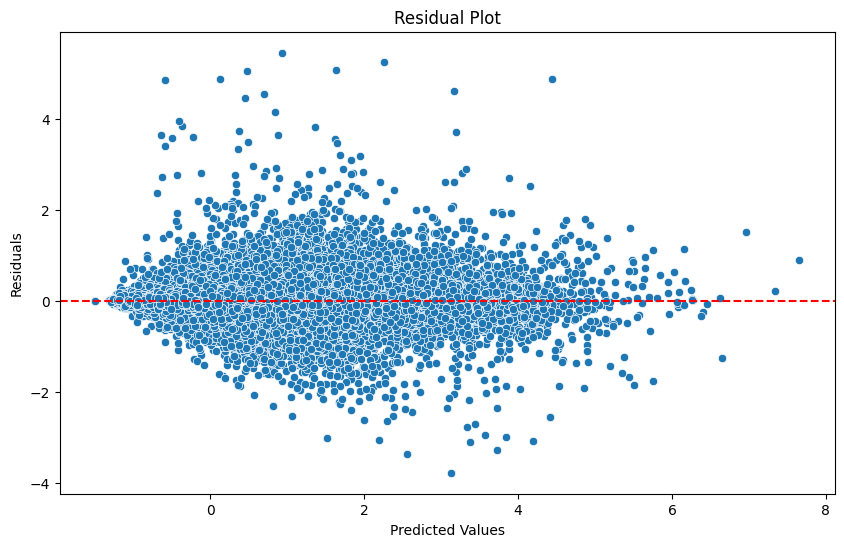

2024-09-23 16:17:47,498 - INFO - Plotting actual vs predicted values...
2024-09-23 16:17:47,500 - INFO - Plotting actual vs predicted values...


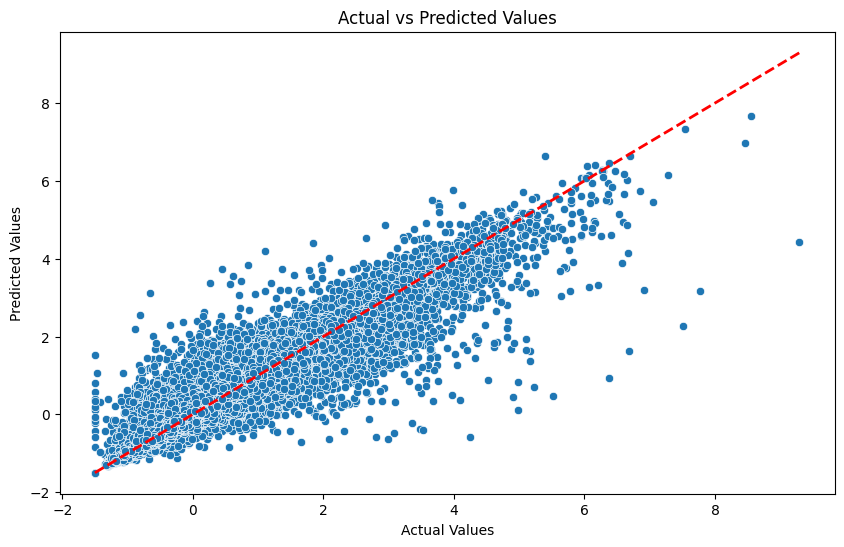

2024-09-23 16:17:50,493 - INFO - Plotting feature importance...
2024-09-23 16:17:50,500 - INFO - Plotting feature importance...


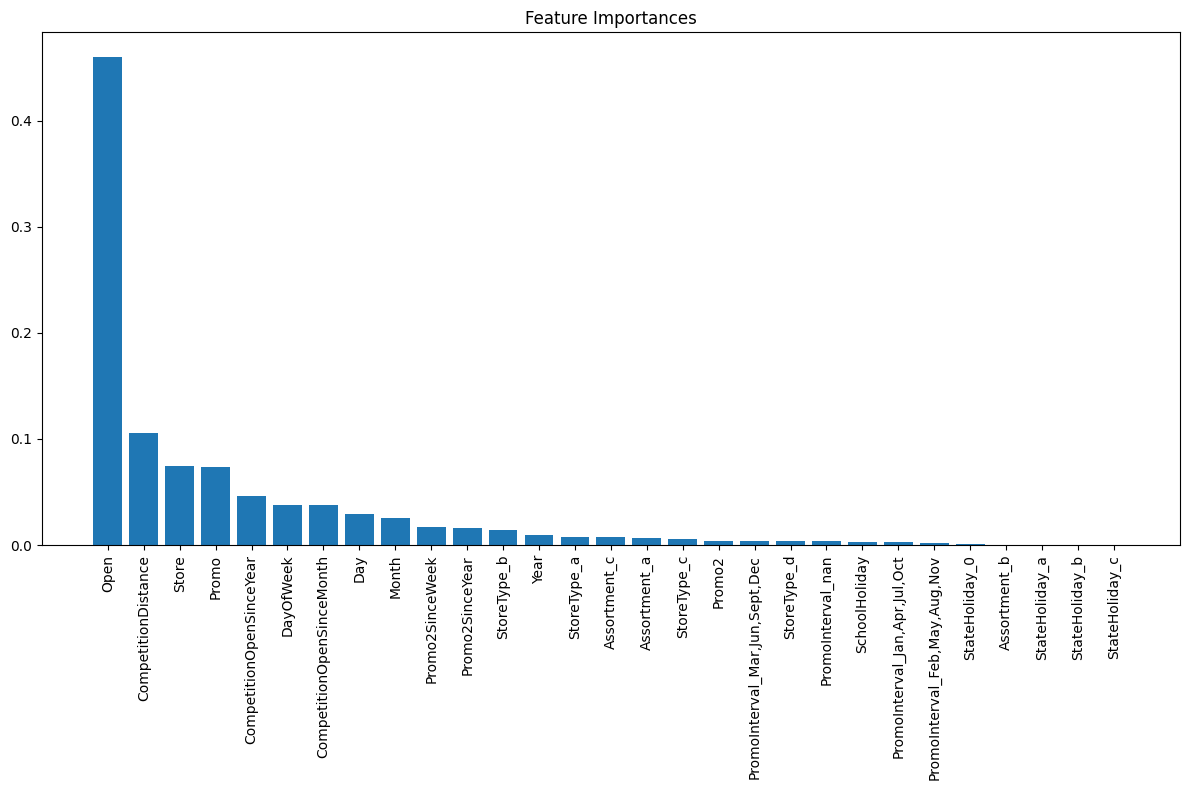

2024-09-23 16:19:04,468 - INFO - Saving model...


Model Performance Metrics:
MSE: 0.0485
RMSE: 0.2201
MAE: 0.1272
R2: 0.9514


2024-09-23 16:21:23,757 - INFO - Model saved to ../models/model_23-09-2024-16-19-04.pkl
2024-09-23 16:21:24,300 - INFO - Process completed successfully!


In [4]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load data
logging.info("Loading data...")
try:
    train = pd.read_csv('../resources/Data/train.csv')
    test = pd.read_csv('../resources/Data/test.csv') 
    store = pd.read_csv('../resources/Data/store.csv') 
except FileNotFoundError as e:
    logging.error(f"File not found: {e}")
    raise
except pd.errors.EmptyDataError:
    logging.error("One of the CSV files is empty.")
    raise
except pd.errors.ParserError as e:
    logging.error(f"Error parsing CSV file: {e}")
    raise

logging.info(f"Train shape: {train.shape}, Test shape: {test.shape}, Store shape: {store.shape}")

# Merge data
logging.info("Merging data...")
train = pd.merge(train, store, on='Store', how='left')
test = pd.merge(test, store, on='Store', how='left')

logging.info(f"Merged train shape: {train.shape}, Merged test shape: {test.shape}")

# Preprocess data
logging.info("Preprocessing data...")
preprocessor = Preprocessor()
try:
    train_processed = preprocessor.preprocess(train)
    test_processed = preprocessor.preprocess(test)
except Exception as e:
    logging.error(f"Preprocessing error: {e}")
    raise

logging.info(f"Processed train shape: {train_processed.shape}, Processed test shape: {test_processed.shape}")

# Split data
logging.info("Splitting data...")
X = train_processed.drop(['Sales', 'Customers'], axis=1)
y = train_processed['Sales']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

logging.info(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
logging.info(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")

# Build and train model
logging.info("Building and training model...")
model_builder = ModelBuilder()
model = model_builder.build_model(X_train, y_train)

# Make predictions
logging.info("Making predictions...")
X_val = X_val.drop('Date', axis=1)
y_pred = model.predict(X_val)

# Evaluate model
logging.info("Evaluating model...")
evaluator = Evaluator()
metrics = evaluator.evaluate(y_val, y_pred)

# Plot residuals
logging.info("Plotting residuals...")
evaluator.plot_residuals(y_val, y_pred, '../models/plots')

# Plot actual vs predicted
logging.info("Plotting actual vs predicted values...")
evaluator.plot_actual_vs_predicted(y_val, y_pred, '../models/plots')

# Plot feature importance
logging.info("Plotting feature importance...")
evaluator.plot_feature_importance(model, X_val, '../models/plots')



print("Model Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric.upper()}: {value:.4f}")

# Save model
logging.info("Saving model...")
model_save_path = '../models'
os.makedirs(model_save_path, exist_ok=True)
model_builder.save_model(model_save_path)

logging.info("Process completed successfully!")